In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import nltk
import string

In [2]:
df = pd.read_csv("bbc-text.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
category    2225 non-null object
text        2225 non-null object
dtypes: object(2)
memory usage: 34.8+ KB


In [4]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [5]:
df['length'] = df['text'].apply(len)

In [6]:
df.head()

,category,text,length
0,tech,tv future in the hands of viewers with home th...,4333
1,business,worldcom boss left books alone former worldc...,1842
2,sport,tigers wary of farrell gamble leicester say ...,1342
3,sport,yeading face newcastle in fa cup premiership s...,2176
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579


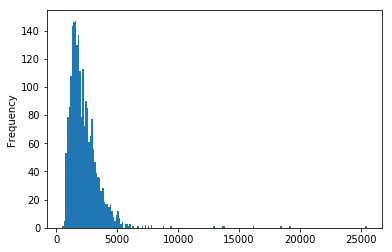

In [11]:
df['length'].plot(bins=200,kind='hist')

In [8]:
df.length.describe()

count     2225.00000
mean      2262.93618
std       1364.10253
min        501.00000
25%       1446.00000
50%       1965.00000
75%       2802.00000
max      25483.00000
Name: length, dtype: float64

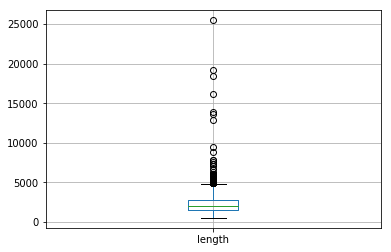

In [12]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E0EB828>,
      dtype=object)

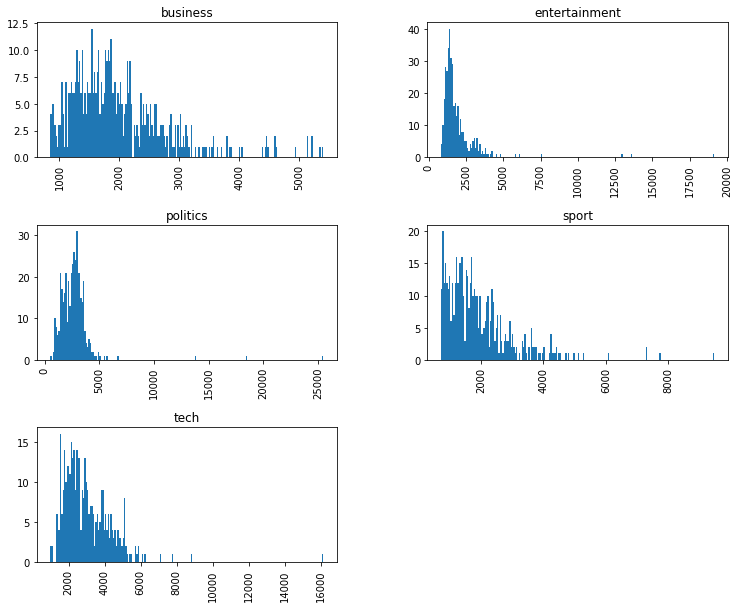

In [16]:
df.hist(column='length', by='category', bins=200,figsize=(12,10))

In [17]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [18]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [19]:
df['text'].apply(text_process)

0       [tv, future, hands, viewers, home, theatre, sy...
1       [worldcom, boss, left, books, alone, former, w...
2       [tigers, wary, farrell, gamble, leicester, say...
3       [yeading, face, newcastle, fa, cup, premiershi...
4       [ocean, twelve, raids, box, office, ocean, twe...
5       [howard, hits, back, mongrel, jibe, michael, h...
6       [blair, prepares, name, poll, date, tony, blai...
7       [henman, hopes, ended, dubai, third, seed, tim...
8       [wilkinson, fit, face, edinburgh, england, cap...
9       [last, star, wars, children, sixth, final, sta...
10      [berlin, cheers, antinazi, film, german, movie...
11      [virgin, blue, shares, plummet, 20, shares, au...
12      [crude, oil, prices, back, 50, cold, weather, ...
13      [hague, given, pm, ambition, former, conservat...
14      [moya, emotional, davis, cup, win, carlos, moy...
15      [korean, credit, card, firm, rescued, south, k...
16      [howard, backs, stem, cell, research, michael,...
17      [conno

In [20]:
df['lenpro'] = df['text'].apply(text_process).apply(len)

In [21]:
df.head()

,category,text,length,lenpro
0,tech,tv future in the hands of viewers with home th...,4333,410
1,business,worldcom boss left books alone former worldc...,1842,190
2,sport,tigers wary of farrell gamble leicester say ...,1342,130
3,sport,yeading face newcastle in fa cup premiership s...,2176,265
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579,177


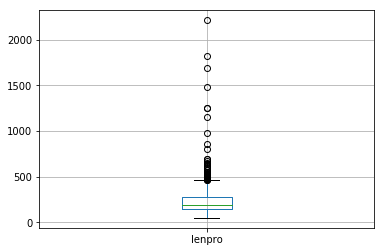

In [24]:
df.boxplot(column = 'lenpro')

In [25]:
df.lenpro.describe()

count    2225.000000
mean      222.101124
std       126.410485
min        48.000000
25%       145.000000
50%       195.000000
75%       273.000000
max      2214.000000
Name: lenpro, dtype: float64

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['text'])


print(len(bow_transformer.vocabulary_))

32955


In [28]:
messages_bow = bow_transformer.transform(df['text'])

In [29]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (2225, 32955)
Amount of Non-Zero occurences:  351196


In [30]:
print(bow_transformer.vocabulary_)

{'tv': 30060, 'future': 12857, 'hands': 13983, 'viewers': 31069, 'home': 14680, 'theatre': 29138, 'systems': 28665, 'plasma': 22278, 'highdefinition': 14460, 'tvs': 30067, 'digital': 9404, 'video': 31050, 'recorders': 23995, 'moving': 19652, 'living': 17740, 'room': 25155, 'way': 31461, 'people': 21852, 'watch': 31427, 'radically': 23594, 'different': 9388, 'five': 12145, 'years': 32218, 'time': 29381, 'according': 2292, 'expert': 11405, 'panel': 21469, 'gathered': 13019, 'annual': 3230, 'consumer': 7759, 'electronics': 10546, 'show': 26554, 'las': 17169, 'vegas': 30924, 'discuss': 9579, 'new': 20152, 'technologies': 28915, 'impact': 15225, 'one': 20842, 'favourite': 11774, 'pastimes': 21645, 'us': 30743, 'leading': 17279, 'trend': 29828, 'programmes': 23088, 'content': 7793, 'delivered': 8994, 'via': 31005, 'networks': 20131, 'cable': 5898, 'satellite': 25567, 'telecoms': 28952, 'companies': 7378, 'broadband': 5541, 'service': 26199, 'providers': 23244, 'front': 12722, 'rooms': 25156,

In [31]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [32]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.47895887991626307


In [33]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [34]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(2225, 32955)


In [42]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, df['category'])

In [43]:
print('predicted:', spam_detect_model.predict(messages_tfidf)[0])
print('expected:', df.category[0])

predicted: tech
expected: tech


In [44]:
print('predicted:', spam_detect_model.predict(messages_tfidf)[45])
print('expected:', df.category[45])

predicted: entertainment
expected: entertainment


In [45]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['tech' 'business' 'sport' ... 'entertainment' 'politics' 'sport']


In [46]:
from sklearn.metrics import classification_report
print (classification_report(df['category'], all_predictions))

               precision    recall  f1-score   support

     business       0.99      0.99      0.99       510
entertainment       1.00      0.98      0.99       386
     politics       0.98      0.99      0.99       417
        sport       1.00      1.00      1.00       511
         tech       0.98      0.99      0.99       401

  avg / total       0.99      0.99      0.99      2225



In [47]:
from sklearn.pipeline import Pipeline


In [48]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(df['text'], df['category'], test_size=0.3)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

1557 668 2225


In [49]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [50]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000000EDD8840>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [51]:
predictions = pipeline.predict(msg_test)

In [52]:
print(classification_report(predictions,label_test))

               precision    recall  f1-score   support

     business       0.95      0.96      0.95       167
entertainment       0.90      0.99      0.94        96
     politics       0.98      0.91      0.95       135
        sport       1.00      0.99      0.99       143
         tech       0.96      0.96      0.96       127

  avg / total       0.96      0.96      0.96       668



In [58]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Logistic Regression classifier
])

In [59]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000000EDD8840>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [60]:
predictions = pipeline.predict(msg_test)

In [61]:
print(classification_report(predictions,label_test))

               precision    recall  f1-score   support

     business       0.95      0.94      0.94       172
entertainment       0.92      0.98      0.95        99
     politics       0.96      0.96      0.96       125
        sport       1.00      0.98      0.99       144
         tech       0.97      0.96      0.96       128

  avg / total       0.96      0.96      0.96       668

